1. Data Manipulation (5 points): Write a Python function that takes a list of lists representing
points (latitude, longitude) and returns the average latitude and average longitude.

In [39]:
def average_latlong(points):
    total_lat = 0
    total_lon = 0
    num_points = len(points)
    for point in points:
        total_lat += point[0]
        total_lon += point[1]
    avg_lat = total_lat / num_points
    avg_lon = total_lon / num_points
    return avg_lat, avg_lon
points_list = [[35, -83], [40, -85], [45, -87]]
average_latitude, average_longitude = average_latlong(points_list)
print(f'Average Latitude: {average_latitude}')
print(f'Average Longitude: {average_longitude}')


Average Latitude: 40.0
Average Longitude: -85.0


2. Conditional Statements (5 points): Write a Python program that reads a CSV file containing
elevation data for points. The program should then identify and print the points with an elevation
above a user-specified threshold.

In [36]:
import csv
def filter_points_above_threshold(file_path, elevation_threshold):
    try:
        with open(elevation.csv, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                    if elevation > elevation_threshold:
                        print(f'Point: Latitude={latitude}, Longitude={longitude}, Elevation={elevation}')
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
csv_file = 'elevation.csv'
user_threshold = float(input('Enter the elevation threshold: '))
filter_points_above_threshold(csv_file, user_threshold)
print(csv_file)

Enter the elevation threshold: 1


NameError: ignored

3. Loops (5 points): Write a Python program that iterates through a dictionary containing county
names and their corresponding population densities. The program should calculate and print the
total population for all counties.
(Hint: Use a random number generator or google the population of your chosen cities to create
the values for the population density. Use 10 different city names.)

In [31]:
def calculate_total_pop(county_popdens_dict):
  total_pop = 0
  for county, population_density in county_popdens_dict.items():
        county_area = 1000
        county_population = population_density * county_area
        total_pop += county_population
  return total_pop
county_popdens_dict = {
    'Middlesex': 900,
    'Suffolk': 1000,
    'Norfolk': 500,
    'Worcester': 400,
    'Berskhire': 100,
    'Hampden': 100,
    'Hampshire': 150,
    'Franklin': 200,
    'Bristol': 350,
    'Plymouth': 400}
total_population = calculate_total_pop(county_popdens_dict)
print(f'Total population: {total_population}')

Total population: 4100000


4. Functions with Arguments (5 points): Write a Python function that takes a shapefile path as
input and returns its area in square kilometers.

In [66]:
import geopandas as gpd
def calculate_shp_area(shp_path):
    try:
        gdf = gpd.read_file(shp_path)
        total_area_km2 = gdf.geometry.area.sum() / (10**6)
        return total_area_km2
    except FileNotFoundError:
        print(f"Error: File '{shp_path}' not found.")
        return None
shapefile_path = 'States_shapefile.shx'
area = calculate_shp_area(shapefile_path)
if area is not None:
    print(f'shapefile: {area:.2f} km2')

shapefile: 0.00 km2


5. Error Handling (5 points): Write a Python program that attempts to read a raster file. If the file
is not found or invalid, the program should print a helpful error message and gracefully exit.

In [6]:
def read_raster(raster_ex):
    try:
        raster_dataset = gdal.Open(raster_ex)
        if raster_dataset is None:
            raise("Invalid raster file.")
        return raster_dataset
    except FileNotFoundError:
        print(f"Error: File '{raster_ex}' not found.")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None
raster_ex = 'raster/file.tif'
raster_data = read_raster(raster_ex)
if raster_data is not None:
    print(f"Raster file: {raster_ex}")
else:
    sys.exit("Example error message.")


Error: exceptions must derive from BaseException


SystemExit: ignored

6.
Problem-Solving (10 points): You are tasked with creating a program to identify areas suitable
for building a new solar farm. You have access to datasets for land cover, slope, and solar
radiation. Describe the workflow of your program, including data preparation, analysis steps, and
final output.


To begin, we'll work with the landcover datasets. These datasets will inform us on what type of land is within the dataset. For example, bodies of water, grasslands, urban or industrial areas with lots of building and concrete coverage. Next we'll add the slope datasets and make sure they lines up with the landcover datasets. The slope datasets will allow us to see the slope of terrain. This part is crucial for our solar farm as we'll need to find flat land. Urban areas with plenty of buildings have a rigid slope and would only be suitable for small solar farms ontop of buildings and roofs. If we're looking to build an expansive solar farm, we'd want to look for a rural area with flat land. Next, we'll add the solar radiation datasets. Here we're looking for areas with large amounts of sun. Now we'll go through each dataset individually and filter out undesirable areas. For the landcover datasets, since we're not looking to build small solar farms ontop of buildings, we can filter out urban areas, as well as bodies of water, privately owned land, and uneven land. Next, with the slope datasets we'll simply filter out any land with uneven slopes regardless of landcover. Lastly, we'll filter the solar radiation datasets by focusing on the areas with the highest amounts of radiation. With the three pairs of datasets filtered, we'll be left with only areas of land that are flat, grassy, and experience large amounts of sunlight.

7. Critical Thinking (10 points): You are given a shapefile of earthquake epicenters and a raster
file of population density. Explain how you would use Python and GIS libraries to identify the
areas most vulnerable to earthquake damage, considering both population density and proximity
to epicenters.

First we'll make sure the geopanda and matplotlib libraries are imported in order to read both the shapefile and raster file. We want to ensure the files are overlapping, so we have accurate representation of where population densities lay in regards to the epicenters and vice versa. Next we'll create circles around the epicenters that uses data of past earthquakes to determine the average size of earthquakes within a specific epicenter to visualize the potential size and range of an earthquake. With the boundaries we created to visualize potential earthquakes, we can then look at the overlapped raster file of population density, which will tell us how densely populated each boundary is. Next we can create a graduated heat map of the population densities, more blue signifying less dense areas and more red signifying denser areas. At this point we will have boundaries representing potential size of earthquakes around epicenters as well as shaded blue to red within the boundaries, allowing a viewer to easily distinguish between the most vulnerable areas and areas that are more safe.

8. Critical Thinking (10 points): You are tasked with creating a visualization that shows the
impacts of climate change on Tennessee agricultural production. You are given a dataset for
precipitation, temperature, and crop output. How would you go about visualizing this in python
and what analyses would need to be done to measure these impacts?

First we want to make sure both the Geopanda and Matplotlib libraries are imported. We can begin by filtering down the map to just show Tennessee. Next we can create a heat map for the temperature dataset. This will clearly show which parts of the state are warmer and where it's cooler. For the other two datasets we can use symbols to quantify the data. For the crop output dataset we first make sure it's lined up with the temperature dataset, then we can add points to the map that symbolize crop output, such as 1 point equals low crop output, up to 3 points symbolizing large crop output. Then, with the precipitation dataset, again making sure it's lined up with the other datasets, we can do the same, one symbol is equal to low precipitation and 3 symbols equals heavy precipitation. This will create a map that clearly distinguishes regions of Tennessee that accounts for temperature, crop output, and precipitation at the same time, allowing viewers to make educated inferences on the impacts of climate change.

9. Geospatial Analysis (10 points): You have a shapefile of national parks and a raster file of
deforestation rates. Design a Python program to calculate the total area of deforestation within
each national park and identify the park with the highest deforestation rate.

Similar procedure as question 7, we'll start by importing both the geopanda and matplotlib libraries. Again making sure the files overlap so the deforestation rates matchup with the national parks. Next you would want to locate the national parks from the shapefile by naming them on the map and giving them a point to easily locate each. A graduated color map would also work well for this example, so creating a graduated color map over the deforestation raster file would work, darker areas signifying higher rates of deforestation and lighter colors signifying low rates. This will create a clear visual of national parks and deforestation rates making the parks easily distinguishable by deforestation rates. You could then create a table that lists the Parks by deforestation rates from top to bottom so that the viewer can see clear results incase there are any parks with thin margins on the map.

10. Shapefile Visualization (10 points): Write a Python program to read a shapefile. Create a map
showing the data points as colored polygons (anything other than circles). Each data point should
be colored based on its magnitude (e.g., green for small (low), yellow for medium (average), red
for large (high)).

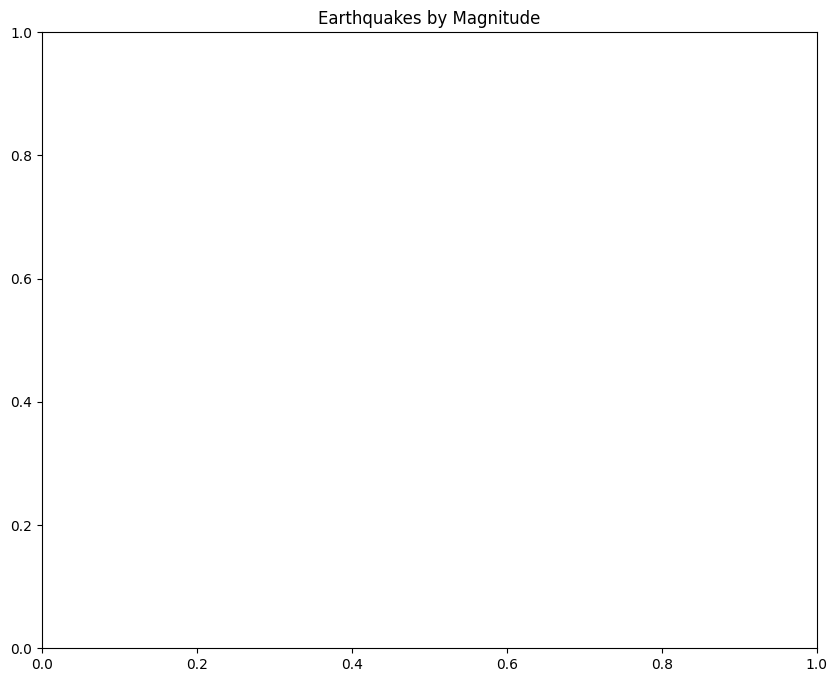

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
num_earthquakes = 10
min_magnitude = 3.0
max_magnitude = 10.0
color_thresholds = [3.0, 6.0, 10.0]
color_labels = ['green', 'yellow', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Earthquakes by Magnitude')
plt.show()

11. Raster Processing and Visualization (10 points): Write a Python program to read a raster file of
precipitation data and apply a colormap to visualize the temperature variations. Add a legend to
the map and ensure clear labels for axes and title.

NameError: ignored

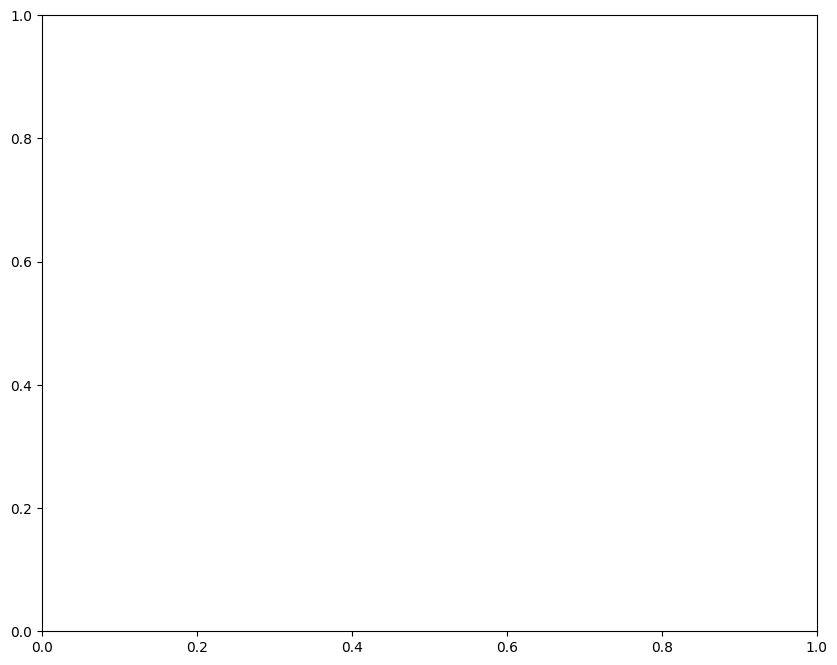

In [32]:
import matplotlib.pyplot as plt
raster_file = 'precipitation.tif'
cmap = Colormap('precipitation', ['red', 'green', 'yellow'])
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Precipitation')
plt.show()

3. Cartographic Design (10 points): Design a map showing the distribution of solar farms in
west, middle, and east Tennessee. Create a raster layer that summarizes the total energy
generated from the solar farms in each of these regions (it can be one raster layer). Discuss which
region has the most solar production and why.

West Tennessee has the most solar production because it has more flat land in the region compared to middle and east Tennessee, allowing for more solar farms to be built as well as receiving more sunlight overall compared to the other regions because there is less mountain and tree cover.

Develop a Python program that automates a repetitive GIS task you encountered during your
project or coursework. Explain the task, your approach, and the benefits of automation.
